# First order defferential equation


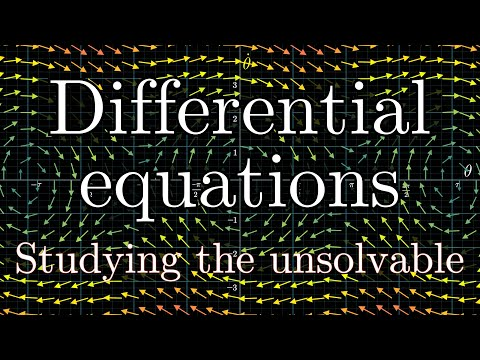

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('p_di4Zn4wz4',width=640,height=360)

## <center>Analytical solution of a first order defferential equation</center>
<img src="analytical_solution.png" style="text-align:center">
## <center>Numerical solution of a first order defferential equation</center>
<img src="numerical_solution.png" style="text-align:center">

### Set up the first order differential equation and convert it into standard form assuming input u(t) is a constant.

a1,a2 and a3 are coefficients of the first order differential equation:  $ a_{1}\dot{y}\left(t\right) + a_{2}y(\left(t\right) = a_{3}u\left(t\right); \ \ y\left(0\right)=y_{0}, \quad where\: u\left(t\right) = 1 $.  
Convert into standard form:  $ \tau \dot{y}\left(t\right) + y\left(t\right) = Ku\left(t\right); \ \ y\left(0\right)=y_{0} $

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# coefficients of the first order differential equation: a1*y'(t) + a2*y(t) = a3*u(t),  where u(t) = 1
a1,a2,a3 = 1,3,-30 # example of y'+3y=-30
y0 = -60 # y(tstart) initial y at t=tstart

# convert into standard form: tau*y'(t) + y(t) = K*u(t)
tau = a1/a2
K = a3/a2

# computational parameters
dt = 0.01  # time step size
tstart = 0 # initial time
tstop = 2  # stop time

# initialize
t = np.arange(tstart,tstop,dt)
y = np.empty(t.shape)
y[0] = Y = y0

# iteratively solve
for i in range(1,t.size):
    Y += (K-Y)/tau*dt
    y[i] = Y

### Plot analytical solution and numerical solution.

In [ ]:
y_analy = K-(K-y0)*np.exp(-(t-tstart)/tau) # analytical solution

y_tau = y0+(K-y0)*(1-np.exp(-1))  # y(tstart+tau) system reaches the 63.2% of the change in value from initial value in one time constant.

plt.figure(figsize=(8,6))
plt.plot(t,y_analy,'r')
plt.plot(t,y)
plt.plot(tstart+tau,y_tau,'go',markerfacecolor='none',markersize=8)
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['analytical solution','numerical solution','( \u03C4, y(\u03C4) )'])
plt.show()

### Interactive tool for getting the solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import HBox,VBox,Label,Layout
from IPython.display import display

def activemodel(a1,a2,a3,y0,tau,K,tstart,tstop,dt):
    t = np.arange(tstart,tstop,dt)
    y = np.empty(t.shape)
    y[0] = Y = y0

    for i in range(1,t.size):
        Y += (K-Y)/tau*dt
        y[i] = Y
    
    y_analy = K-(K-y0)*np.exp(-(t-tstart)/tau) # analytical solution
    
    y_tau = y0+(K-y0)*(1-np.exp(-1))  # y(tau) system reaches the 63.2% of the change in value from initial value in one time constant.
    
    plt.figure(figsize=(8,6))
    plt.plot(t,y_analy,'r')
    plt.plot(t,y)
    plt.plot(tstart+tau,y_tau,'go',markerfacecolor='none',markersize=8)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['analytical solution','numerical solution','( \u03C4, y(\u03C4) )'])
    plt.show()
    
    print('Time constant: \u03C4= %.2f' % tau)

In [ ]:
# default settings
a1,a2,a3 = 1,3,-30
y0 = -60
tau = a1/a2
K = a3/a2
tstart,tstop,dt = 0.0,2.0,0.01

L_s = Layout(width='12%')
L_m = Layout(width='20%')
L_l = Layout(width='35%')
L_ctr = Layout(justify_content='center')
L_ard = Layout(justify_content='space-around')
L_left = Layout(justify_content='flex-start')

w_tstart = widgets.FloatText(value=tstart,description=r'\(Start\ time\)',layout=L_m)
w_tstop = widgets.FloatLogSlider(value=tstop,base=10,min=np.log10(tstart+10*dt),max=np.log10(tstart+10*dt)+3,step=0.1,description=r'\(Stop\ time\)',continuous_update=False,readout_format='.1f',layout=L_l)
w_dt = widgets.BoundedFloatText(value=dt,min=1e-6,max=1,description=r'\(Time\ step\)',layout=L_m)
w_a1 = widgets.FloatText(value=a1,layout=L_l)
w_a2 = widgets.FloatText(value=a2,layout=L_l)
w_a3 = widgets.FloatText(value=a3,layout=L_l)
w_y0 = widgets.FloatText(value=y0,layout=L_m)
w_K = widgets.FloatText(value=K,layout=L_m)
w_tau = widgets.FloatSlider(value=tau,min=dt,max=tstop,step=dt,continuous_update=False,readout_format='.1f',layout=L_l)

def update_tstop(*args):
    w_tstop.value = w_tstart.value+tstop
    w_tstop.min = np.log10(w_tstart.value+10*dt)
    w_tstop.max = np.log10(w_tstart.value+10*dt)+3
w_tstart.observe(update_tstop,'value')
w_dt.observe(update_tstop,'value')

def update_tau(*args):
    w_tau.min = w_dt.value
    w_tau.max = max(w_tstop.value,w_a1.value/w_a2.value)
    w_tau.step = w_dt.value
    w_tau.value = w_a1.value/w_a2.value
    w_K.value = w_a3.value/w_a2.value
w_a1.observe(update_tau,'value')
w_a2.observe(update_tau,'value')
w_a3.observe(update_tau,'value')
w_tstop.observe(update_tau,'value')    
w_dt.observe(update_tau,'value')

def update_a(*args):
    w_a1.value = w_a2.value*w_tau.value
    w_a3.value = w_a2.value*w_K.value
w_tau.observe(update_a,'value')
w_K.observe(update_a,'value')


ui = VBox([HBox([w_tstart,w_tstop,w_dt],layout=L_left),
           Label(value=r'\( \quad Differential\ equation:\quad a_{1}\dot{y}\left(t\right) + a_{2}y(\left(t\right) = a_{3}; \ \ y\left(0\right)=y_{0} \)'),
           HBox([HBox([Label(value=r'\(a_{1}\)',layout=L_s),w_a1],layout=L_ctr),HBox([Label(value=r'\(a_{2}\)',layout=L_s),w_a2],layout=L_ctr),
                 HBox([Label(value=r'\(a_{3}\)',layout=L_s),w_a3],layout=L_ctr)],layout=L_left),
           Label(value=r'\( \quad Standard\ form:\quad \tau\dot{y}\left(t\right) + y\left(t\right) = K; \ \ y\left(0\right)=y_{0} \)'),
           HBox([HBox([Label(value=r'\( Initial\ value\ y_{0} \)',layout=L_m),w_y0,Label(value=r'\(Final\ value\ K\)',layout=L_m),w_K],layout=L_ctr),
                 Label(value=r'\( Time\ constant\ \tau \)',layout=L_s),w_tau],layout=L_left) ])

out = widgets.interactive_output(activemodel,{'tstart':w_tstart,'tstop':w_tstop,'dt':w_dt,
                                              'a1':w_a1,'a2':w_a2,'a3':w_a3,'y0':w_y0,'K':w_K,'tau':w_tau})

display(ui,out)